In [1]:
# 1) Setup imports and load dataset (prefers cleaned CSV)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set(style="whitegrid")
print('Current working dir:', os.getcwd())
print('Files in workspace (top 40):')
print(os.listdir(os.getcwd())[:40])

candidates = ['loan_data_2007_2014_cleaned.csv', 'loan_data_2007_2014.csv']
data_file = None
for f in candidates:
    if os.path.exists(f):
        data_file = f
        break

if data_file is None:
    raise FileNotFoundError('Tidak menemukan dataset di workspace root. Letakkan CSV di folder proyek atau ubah path.')

print('Loading', data_file)
df = pd.read_csv(data_file, low_memory=False)
print('Loaded shape:', df.shape)

# tampilkan sample ringkas
display(df.head())

# simpan contoh kecil untuk quick checks jika dataset besar
sample = df.sample(n=min(5000, len(df)), random_state=42) if len(df) > 5000 else df.copy()
print('Sample shape for exploratory work:', sample.shape)

Current working dir: d:\Rakamin\Final test
Files in workspace (top 40):
['.vscode', 'creditrisk.ipynb', 'LCDataDictionary.xlsx', 'loan_data_2007_2014.csv', 'loan_data_cleaned.csv']
Loading loan_data_2007_2014.csv
Loaded shape: (466285, 75)
Loaded shape: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sample shape for exploratory work: (5000, 75)


In [2]:
# 3) Struktur data: dtypes, jumlah kolom, unique counts kecil, dan deskriptif numerik
print('Columns:', len(df.columns))
print('\nColumn dtypes summary:')
display(df.dtypes.value_counts())

# unique counts for top columns (helpful to spot ids vs categories)
unique_counts = df.nunique(dropna=False).sort_values(ascending=False)
display(unique_counts.head(50))

print('\nNumeric description:')
display(df.select_dtypes(include=[np.number]).describe().T)

print('\nNon-numeric sample description:')
display(df.select_dtypes(exclude=[np.number]).head())

Columns: 75

Column dtypes summary:


float64    46
object     22
int64       7
Name: count, dtype: int64

Unnamed: 0                     466285
id                             466285
member_id                      466285
url                            466285
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_int                  270249
tot_cur_bal                    220691
emp_title                      205476
last_pymnt_amnt                198194
total_rec_prncp                172713
out_prncp_inv                  141189
out_prncp                      135665
desc                           124436
title                           63099
revol_bal                       58142
installment                     55622
annual_inc                      31902
recoveries                      22773
collection_recovery_fee         20275
total_rev_hi_lim                14613
funded_amnt_inv                  9854
tot_coll_amt                     6322
total_rec_late_fee               5808
dti                              3997
funded_amnt                      1354
loan_amnt   


Numeric description:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01



Non-numeric sample description:


,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,Fully Paid,n,...,credit_card,Computer,860xx,AZ,Jan-85,f,Jan-15,NaN,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,...,car,bike,309xx,GA,Apr-99,f,Apr-13,NaN,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,...,small_business,real estate business,606xx,IL,Nov-01,f,Jun-14,NaN,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,...,other,personel,917xx,CA,Feb-96,f,Jan-15,NaN,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,...,other,Personal,972xx,OR,Jan-96,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL


Columns with missing values:


,missing_count,missing_pct
inq_fi,466285,100.000000
open_rv_24m,466285,100.000000
max_bal_bc,466285,100.000000
all_util,466285,100.000000
inq_last_12m,466285,100.000000
annual_inc_joint,466285,100.000000
verification_status_joint,466285,100.000000
dti_joint,466285,100.000000
total_cu_tl,466285,100.000000
il_util,466285,100.000000


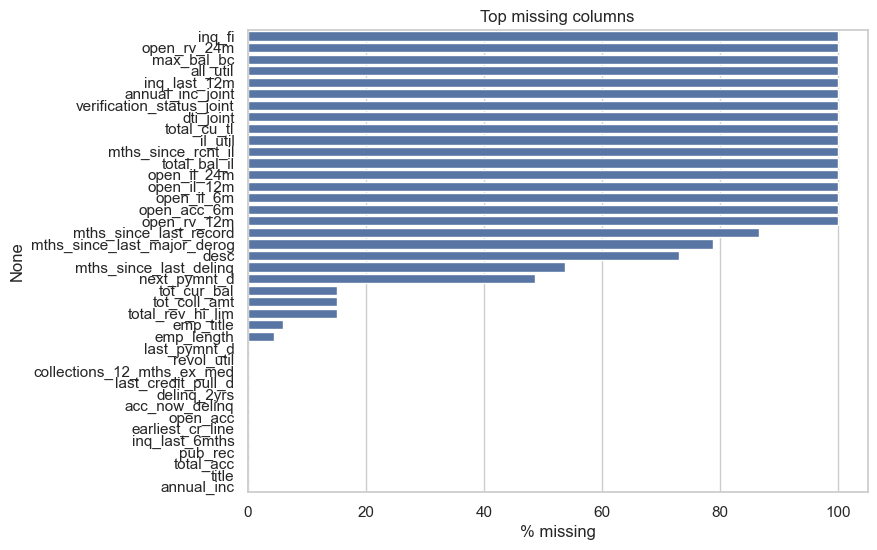

In [3]:
# 4) Missing-value report (counts & percent)
missing_count = df.isnull().sum()
missing_pct = (missing_count / len(df)) * 100
missing = pd.concat([missing_count, missing_pct], axis=1)
missing.columns = ['missing_count', 'missing_pct']
missing = missing[missing['missing_count'] > 0].sort_values('missing_count', ascending=False)
print('Columns with missing values:')
display(missing.head(100))

# Visualize top missing columns if present
if not missing.empty:
    plt.figure(figsize=(8, min(6, len(missing))))
    sns.barplot(x='missing_pct', y=missing.index[:40], data=missing.reset_index().rename(columns={'index':'col'}).iloc[:40])
    plt.xlabel('% missing')
    plt.title('Top missing columns')
    plt.show()

Numeric columns count: 53


,count,mean,std,min,25%,50%,75%,max,iqr,outlier_rule_lower,outlier_rule_upper
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05,2.331420e+05,-2.331420e+05,6.994260e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07,1.709122e+07,-2.199685e+07,4.636804e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07,1.862184e+07,-2.355305e+07,5.093430e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,1.200000e+04,-1.000000e+04,3.800000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04,1.200000e+04,-1.000000e+04,3.800000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04,1.195000e+04,-9.925000e+03,3.787500e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01,5.500000e+00,2.740000e+00,2.474000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03,3.098900e+02,-2.081450e+02,1.031415e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06,4.396000e+04,-2.094000e+04,1.549000e+05
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01,1.142000e+01,-5.770000e+00,3.991000e+01


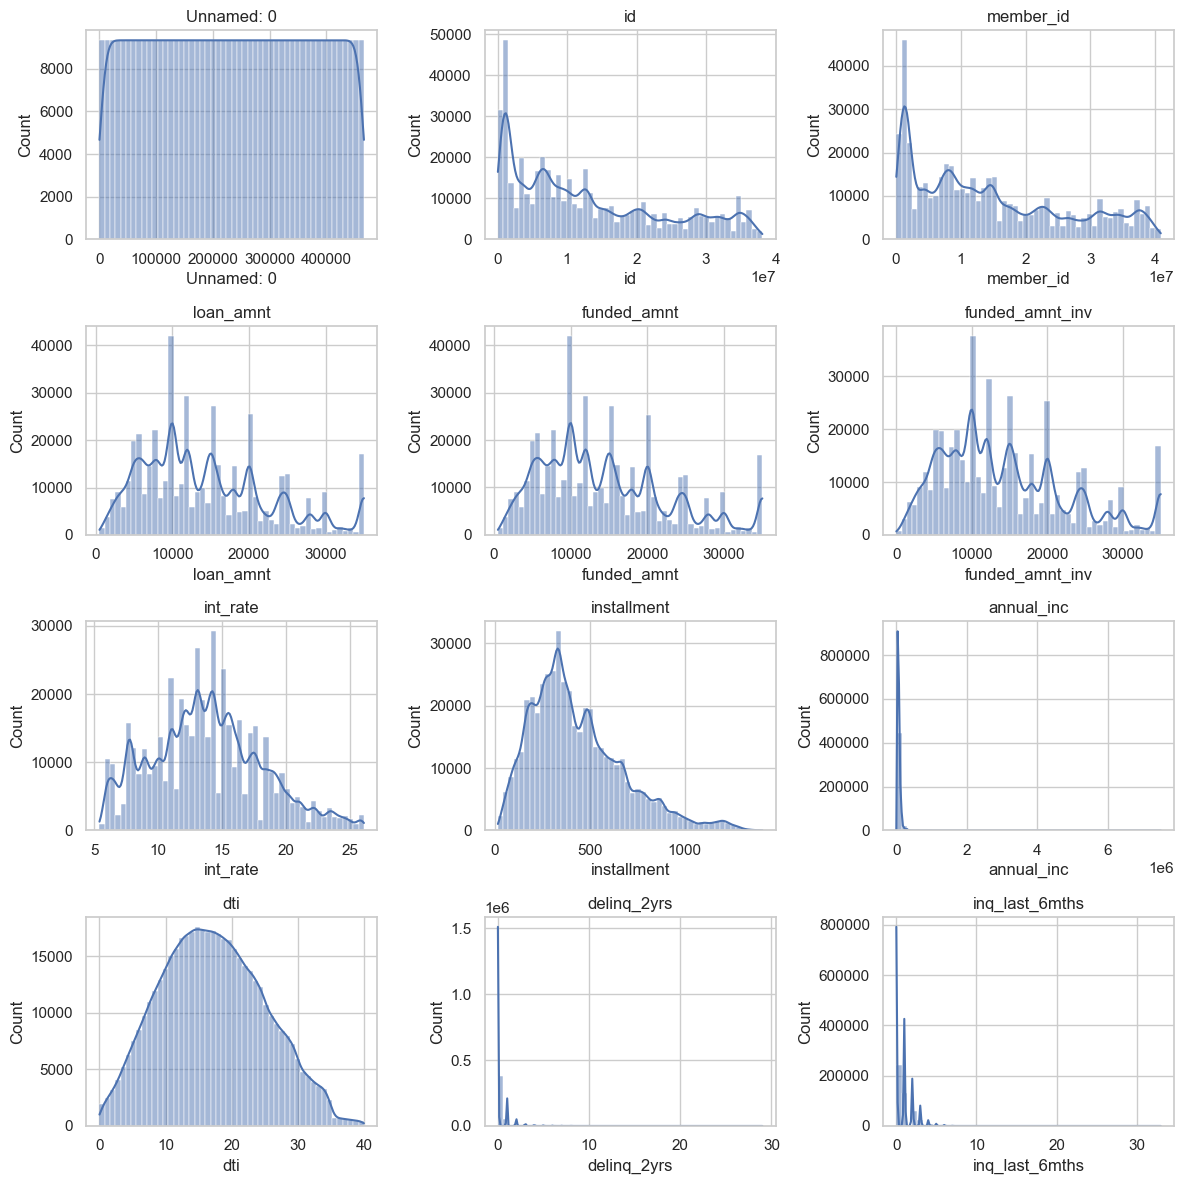

In [4]:
# 5) Numeric distributions (histograms) and outlier summary for numeric cols
numeric = df.select_dtypes(include=[np.number])
print('Numeric columns count:', numeric.shape[1])

if numeric.shape[1] > 0:
    desc = numeric.describe().T
    desc['iqr'] = desc['75%'] - desc['25%']
    desc['outlier_rule_upper'] = desc['75%'] + 1.5 * desc['iqr']
    desc['outlier_rule_lower'] = desc['25%'] - 1.5 * desc['iqr']
    display(desc[['count','mean','std','min','25%','50%','75%','max','iqr','outlier_rule_lower','outlier_rule_upper']].head(50))

    # plot up to 12 histograms
    cols = list(numeric.columns)[:12]
    ncols = 3
    nrows = int(np.ceil(len(cols) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = axes.flatten()
    for ax, c in zip(axes, cols):
        sns.histplot(df[c].dropna(), kde=True, ax=ax, bins=50)
        ax.set_title(c)
    for ax in axes[len(cols):]:
        fig.delaxes(ax)
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns found.')

Numeric columns considered for correlation: 53


,var1,var2,corr,abs_corr
0,out_prncp,out_prncp_inv,0.999998,0.999998
1,loan_amnt,funded_amnt,0.998022,0.998022
2,id,member_id,0.997338,0.997338
3,funded_amnt,funded_amnt_inv,0.995872,0.995872
4,total_pymnt,total_pymnt_inv,0.995326,0.995326
5,loan_amnt,funded_amnt_inv,0.993254,0.993254
6,total_pymnt,total_rec_prncp,0.954853,0.954853
7,funded_amnt,installment,0.951751,0.951751
8,total_pymnt_inv,total_rec_prncp,0.950197,0.950197
9,loan_amnt,installment,0.948753,0.948753


C:\Users\mirza\AppData\Local\Temp\ipykernel_17216\3922870926.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='abs_corr', y=labels, data=top, palette='viridis')


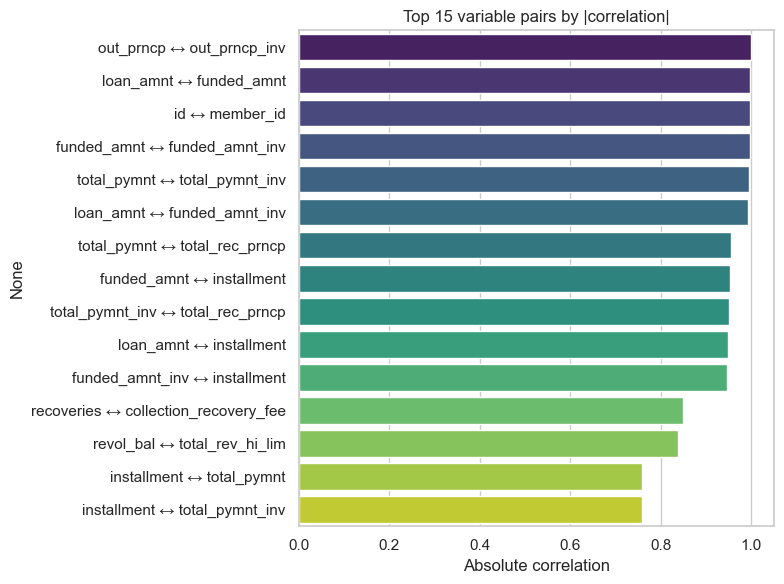

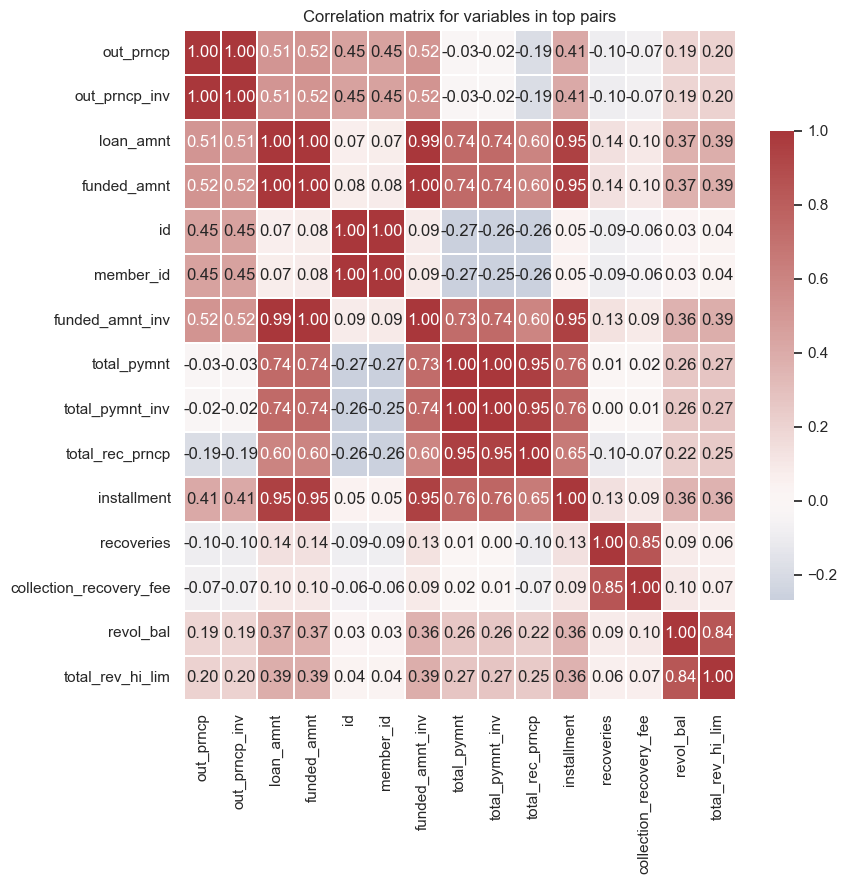

In [5]:
    # 6) Top correlation pairs — show only the best correlations 
    numeric_sample = sample.select_dtypes(include=[np.number]) if 'sample' in globals() else df.select_dtypes(include=[np.number])
    n = numeric_sample.shape[1]
    print('Numeric columns considered for correlation:', n)
    if n <= 1:
        print('Not enough numeric columns for correlation analysis.')
    else:
        corr = numeric_sample.corr()
        import numpy as _np
        # user-tunable: how many top pairs to show
        top_k = 15
        # compute upper triangle (exclude diagonal) and stack
        mask_u = _np.triu(_np.ones(corr.shape, dtype=bool), k=1)
        upper = corr.where(mask_u)
        stacked = upper.stack()  # pairs with i<j
        if stacked.empty:
            print('No variable pairs found (maybe all NaN correlations).')
        else:
            # sort by absolute value and take top_k
            s_abs = stacked.abs().sort_values(ascending=False)
            k = min(top_k, len(s_abs))
            top = s_abs.iloc[:k].reset_index()
            top.columns = ['var1','var2','abs_corr']
            # retrieve signed correlation
            top['corr'] = top.apply(lambda r: corr.at[r['var1'], r['var2']], axis=1)
            # display concise table
            display(top[['var1','var2','corr','abs_corr']])
            # barplot of absolute correlations
            plt.figure(figsize=(8, max(2, k * 0.4)))
            labels = top.apply(lambda r: f"{r['var1']} ↔ {r['var2']}" , axis=1)
            sns.barplot(x='abs_corr', y=labels, data=top, palette='viridis')
            plt.xlabel('Absolute correlation')
            plt.title(f'Top {k} variable pairs by |correlation|')
            plt.tight_layout()
            plt.show()
            # small heatmap for involved variables if subset is small
            involved = pd.unique(top[['var1','var2']].values.ravel())
            if len(involved) <= 20:
                sub = corr.loc[involved, involved]
                plt.figure(figsize=(max(4, len(involved)*0.6), max(3, len(involved)*0.6)))
                sns.heatmap(sub, annot=True, fmt='.2f', cmap='vlag', center=0, linewidths=0.2, cbar_kws={'shrink':0.7})
                plt.title('Correlation matrix for variables in top pairs')
                plt.tight_layout()
                plt.show()
            else:
                print(f'Skipping small heatmap: {len(involved)} unique variables in top pairs (too many to display).')

Auto-detected target column: loan_status


loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

C:\Users\mirza\AppData\Local\Temp\ipykernel_17216\222551931.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


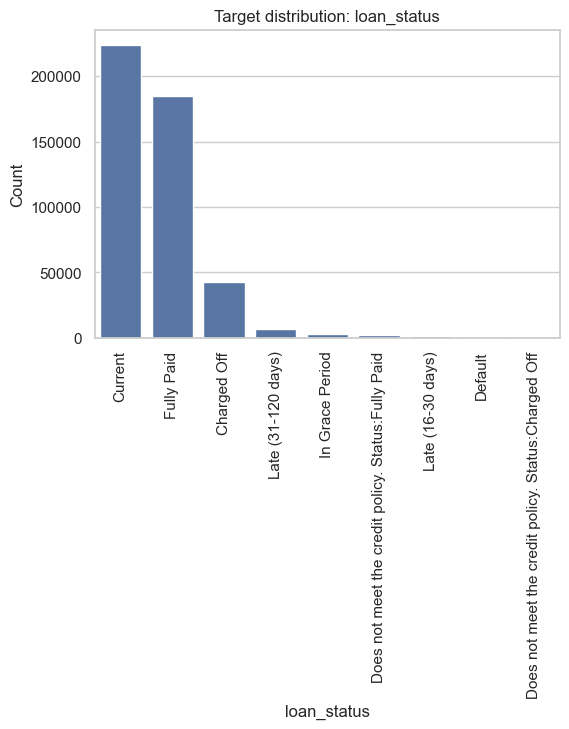

In [6]:
# 7) Detect common target columns and show distribution (if found)
possible_targets = ['loan_status', 'is_bad', 'bad_loan', 'target', 'default', 'y']
found = [c for c in possible_targets if c in df.columns]

if found:
    target = found[0]

# Data Preparation

In [12]:
import pandas as pd
import numpy as np

# --- Hapus kolom duplikat ---
df = df.loc[:, ~df.columns.duplicated()]

# --- Hapus kolom dengan missing value terlalu banyak (>40%) ---
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.4].index
print(f"Menghapus {len(cols_to_drop)} kolom karena missing value > 40%")
df.drop(columns=cols_to_drop, inplace=True)

# --- Hapus baris duplikat ---
before = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Menghapus {before - df.shape[0]} baris duplikat")

# --- Normalisasi nama kolom ---
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# --- Tangani nilai kosong ---
# Untuk kolom numerik → isi dengan median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Untuk kolom kategorikal → isi dengan modus
cat_cols = df.select_dtypes(exclude=[np.number]).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

# --- Bersihkan kolom numerik yang tersimpan sebagai string ---
for col in df.columns:
    if df[col].dtype == 'object':
        # Contoh: ubah "36 months" → 36
        if df[col].str.contains('month', case=False, na=False).any():
            df[col] = df[col].str.extract('(\d+)').astype(float)
        # Contoh: ubah "10%" → 0.10
        elif df[col].str.contains('%', na=False).any():
            df[col] = df[col].str.replace('%', '', regex=False).astype(float) / 100

# --- Bersihkan kolom target ---
possible_targets = ['loan_status', 'is_bad', 'bad_loan', 'target', 'default', 'y']
found = [c for c in possible_targets if c in df.columns]
if found:
    target = found[0]
    print(f"Kolom target terdeteksi: {target}")
    # Baru: labelisasi biner → only 'Fully Paid' dianggap good (0), semua lainnya bad (1)
    df[target] = df[target].apply(lambda x: 0 if 'fully paid' in str(x).strip().lower() else 1).astype(int)
else:
    print("Kolom target tidak ditemukan, harap tentukan secara manual.")

# --- Hapus kolom ID atau informasi bocor (data leakage) ---
id_cols = ['id', 'member_id', 'url', 'title', 'policy_code']
df.drop(columns=[c for c in id_cols if c in df.columns], inplace=True, errors='ignore')

# --- Cek tipe data hasil akhir ---
print("\n📋 Info Dataset Setelah Cleaning:")
print(df.info())
print("\nMissing value tersisa per kolom:")
print(df.isnull().sum()[df.isnull().sum() > 0])

output_path = "loan_data_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Data cleaning selesai. File disimpan sebagai: {output_path}")


<>:35: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mirza\AppData\Local\Temp\ipykernel_17216\1399563756.py:35: SyntaxWarning: invalid escape sequence '\d'
  df[col] = df[col].str.extract('(\d+)').astype(float)


Menghapus 1 kolom karena missing value > 40%
Menghapus 0 baris duplikat
Menghapus 0 baris duplikat
Kolom target terdeteksi: loan_status
Kolom target terdeteksi: loan_status

📋 Info Dataset Setelah Cleaning:

📋 Info Dataset Setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unnamed:_0                  466285 non-null  int64  
 1   loan_amnt                   466285 non-null  int64  
 2   funded_amnt                 466285 non-null  int64  
 3   funded_amnt_inv             466285 non-null  float64
 4   term                        466285 non-null  float64
 5   int_rate                    466285 non-null  float64
 6   installment                 466285 non-null  float64
 7   grade                       466285 non-null  object 
 8   sub_grade                   466285 non-null  object 
 9   emp_l

loan_status_binary
1    1.0
Name: proportion, dtype: float64


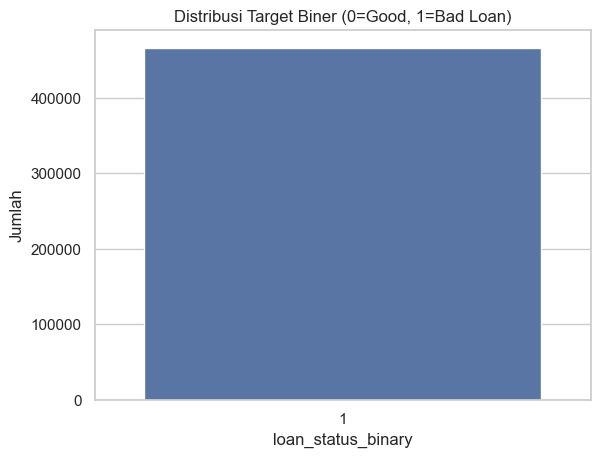

In [ ]:
# --- Standarisasi nilai loan_status menjadi biner (good vs bad loan) ---

def categorize_loan_status(status):
    status = str(status).strip().lower()
    # Only treat entries that contain 'fully paid' as good (0); everything else is bad (1)
    return 0 if 'fully paid' in status else 1

df['loan_status_binary'] = df['loan_status'].apply(categorize_loan_status)

# Cek hasil distribusi baru (counts & percent) dan tampilkan secara terformat
counts = df['loan_status_binary'].value_counts().sort_index()
labels = {0: 'Good (Fully Paid)', 1: 'Bad (Others)'}
dist_df = pd.DataFrame({
    'label': [labels.get(i, str(i)) for i in counts.index],
    'count': counts.values,
    'percent': (counts.values / counts.sum() * 100).round(2)
})
display(dist_df)
print(f"Good: {counts.get(0,0)} ({(counts.get(0,0)/counts.sum()*100):.2f}%)")
print(f"Bad: {counts.get(1,0)} ({(counts.get(1,0)/counts.sum()*100):.2f}%)")

# Visual: simple countplot with readable x-labels
plt.figure(figsize=(5,3))
sns.countplot(x=df['loan_status_binary'], order=[0,1], palette=['tab:green','tab:red'])
plt.xticks([0,1], ['Good (0)','Bad (1)'])
plt.title('Distribusi Target Biner (0=Good, 1=Bad Loan)')
plt.xlabel('loan_status_binary')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


## Endocding

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# --- Salin data ---
X_encoded = X.copy()

# 1️⃣ Kolom ordinal: grade
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
X_encoded['grade'] = X_encoded['grade'].map({g: i for i, g in enumerate(grade_order)})

# 2️⃣ Subgrade seperti "A1", "B2"
def encode_subgrade(x):
    try:
        if isinstance(x, str) and len(x) == 2 and x[0] in grade_order and x[1].isdigit():
            return grade_order.index(x[0]) * 5 + int(x[1])
    except:
        return np.nan
    return np.nan

X_encoded['sub_grade'] = X_encoded['sub_grade'].apply(encode_subgrade)

# 3️⃣ Durasi kerja
X_encoded['emp_length'] = (
    X_encoded['emp_length']
    .replace({'10+ years': 10, '< 1 year': 0, 'n/a': np.nan})
    .replace(to_replace=' years| year', value='', regex=True)
)
X_encoded['emp_length'] = pd.to_numeric(X_encoded['emp_length'], errors='coerce')

# 4️⃣ Kolom tanggal → ordinal
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    if col in X_encoded.columns:
        X_encoded[col] = pd.to_datetime(X_encoded[col], errors='coerce')
        X_encoded[col] = X_encoded[col].apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

# 5️⃣ Label encoding untuk kategorikal
label_cols = [
    'home_ownership', 'verification_status', 'pymnt_plan',
    'purpose', 'zip_code', 'addr_state',
    'initial_list_status', 'application_type'
]

for col in label_cols:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))

# 6️⃣ Pastikan semua numerik
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Simpan daftar kolom sebelum imputasi
before_cols = X_encoded.columns

# Imputasi
imputer = SimpleImputer(strategy='median')
X_imputed_array = imputer.fit_transform(X_encoded)

# Ambil kolom yang punya median valid
valid_cols_mask = ~np.isnan(imputer.statistics_)
after_cols = X_encoded.columns[valid_cols_mask]

# Buat DataFrame baru
X_imputed = pd.DataFrame(X_imputed_array, columns=after_cols)

# Bandingkan hasil
print("Jumlah kolom sebelum imputasi:", len(before_cols))
print("Jumlah kolom setelah imputasi:", len(after_cols))
print("\nKolom yang hilang:")
print(set(before_cols) - set(after_cols))


NameError: name 'X' is not defined

## SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# --- 1️⃣ Pastikan indeks X dan y selaras ---
X_imputed = X_imputed.reset_index(drop=True)
y = y.reset_index(drop=True)

print("Ukuran awal X_imputed:", X_imputed.shape)
print("Ukuran awal y:", y.shape)

# --- 2️⃣ Split data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

print("\nDistribusi kelas sebelum SMOTE:")
print(Counter(y_train))

# --- 3️⃣ Terapkan SMOTE di data train ---
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# --- 4️⃣ Tampilkan hasil ---
print("\nDistribusi kelas sesudah SMOTE:")
print(Counter(y_train_res))

print("\nUkuran data sebelum SMOTE :", X_train.shape)
print("Ukuran data sesudah SMOTE  :", X_train_res.shape)


Ukuran awal X_imputed: (466285, 44)
Ukuran awal y: (466285,)

Distribusi kelas sebelum SMOTE:
Counter({0: 365925, 1: 7103})

Distribusi kelas sesudah SMOTE:
Counter({0: 365925, 1: 365925})

Ukuran data sebelum SMOTE : (373028, 44)
Ukuran data sesudah SMOTE  : (731850, 44)


# Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 1️⃣ Normalisasi data (opsional tapi direkomendasikan) ---
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# --- 2️⃣ Buat model Logistic Regression ---
logreg = LogisticRegression(random_state=42, max_iter=1000)  # max_iter ditambah untuk konvergensi
logreg.fit(X_train_res_scaled, y_train_res)

# --- 3️⃣ Prediksi data test ---
y_pred = logreg.predict(X_test_scaled)

# --- 4️⃣ Evaluasi model ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7293822447644681

Confusion Matrix:
 [[66607 24874]
 [  363  1413]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84     91481
           1       0.05      0.80      0.10      1776

    accuracy                           0.73     93257
   macro avg       0.52      0.76      0.47     93257
weighted avg       0.98      0.73      0.83     93257



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# --- 1️⃣ Normalisasi data (sudah dilakukan sebelumnya) ---
# X_train_res_scaled, X_test_scaled

# --- 2️⃣ Buat model SVC ---
svc = SVC(kernel='linear', class_weight='balanced', random_state=42)
svc.fit(X_train_res_scaled, y_train_res)

# --- 3️⃣ Prediksi data test ---
y_pred_svc = svc.predict(X_test_scaled)

# --- 4️⃣ Evaluasi model ---
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


NameError: name 'X_train_res_scaled' is not defined